# Outline of IQA to Snow Functions

## In a directory for a particular AOI and comparision set
### e.g. CLPX Outcrops; 2012 v. 2018
### read IQA maps, snow depth maps, and DEM

## Threshold IQA Maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import pandas as pd
import seaborn as sns
import glob
from scipy.signal import savgol_filter

In [2]:
# In a base directory, choose (or find two years) and read these data
src = rasterio.open('../subsets/clpx_outcrops/raster/snow_depth/clpx_outcrops_snow_depth_2018.tif')
sd_2018 = src.read(1)
src = rasterio.open('../subsets/clpx_outcrops/raster/snow_depth/clpx_outcrops_snow_depth_2012.tif')
sd_2012 = src.read(1)
src = rasterio.open('../subsets/clpx_outcrops/raster/iqa/2012_v._2018/2012_v._2018_nrmse_arr.tif')
nrmse = src.read(1)
src = rasterio.open('../subsets/clpx_outcrops/raster/iqa/2012_v._2018/2012_v._2018_ssim_arr.tif')
ssim = src.read(1)
src = rasterio.open('../subsets/clpx_outcrops/raster/iqa/2012_v._2018/2012_v._2018_cwssim_arr.tif')
cwssim = src.read(1)
src = rasterio.open('../subsets/clpx_outcrops/raster/iqa/2012_v._2018/2012_v._2018_gms_arr.tif')
gms = src.read(1)
src = rasterio.open('../subsets/clpx_outcrops/raster/dem/clpx_outcrops_dem.tif')
dem = src.read(1)

# this could be a function (i.e. read rasters to dictionary)

In [3]:
# This function finds n minimum elemnts of an array
# We can use it to find the least similar locations of two patterns

def find_min_indicies(arr, n_elements):
    
    flat_indicies = np.argpartition(arr.ravel(), n_elements - 1)[:n_elements]
    row_indicies, col_indicies = np.unravel_index(flat_indicies, arr.shape)
    return [i for i in zip(col_indicies, row_indicies)]

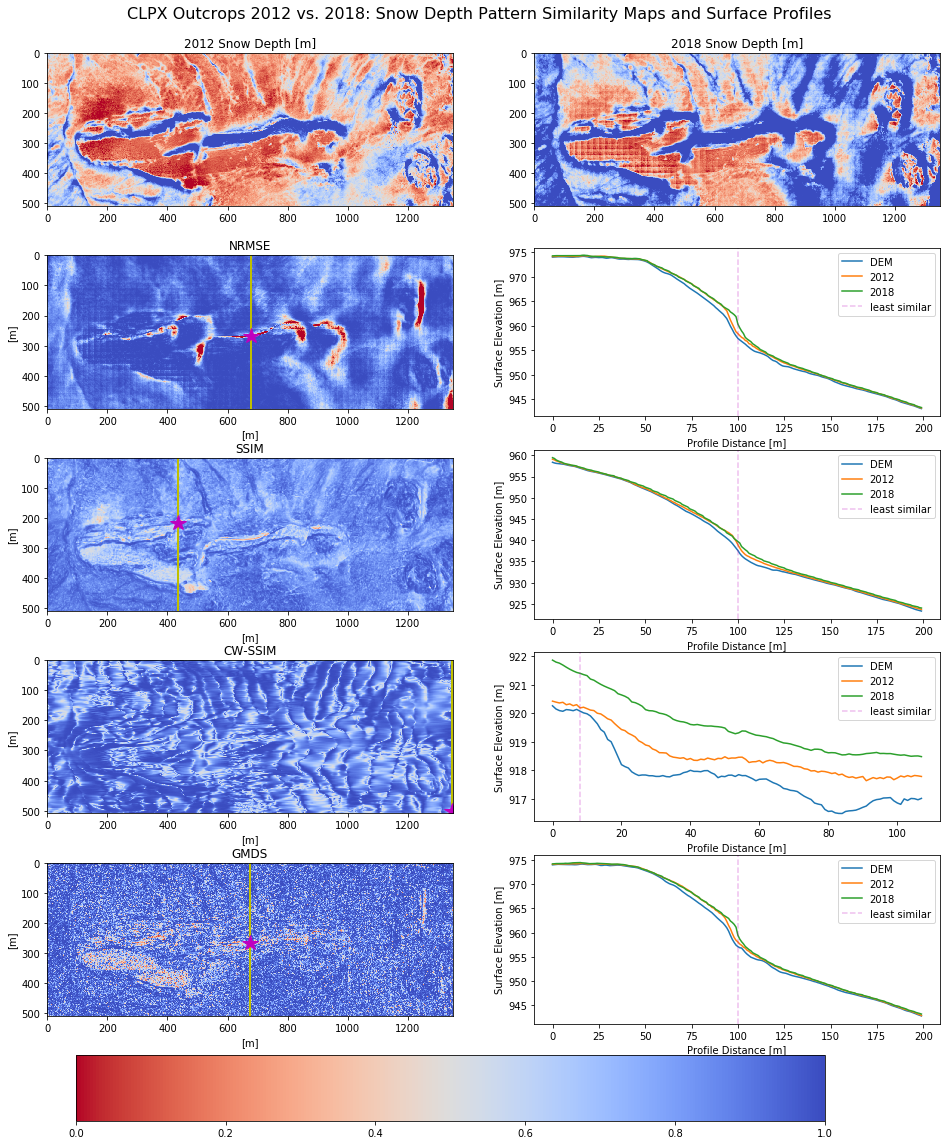

In [4]:
# Plot Snow Depth Maps, IQA Maps, and Profiles from the Minimal point
f, axes = plt.subplots(5, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,18))
titles = ['NRMSE', 'SSIM', 'CW-SSIM', 'GMDS']

axes[0][0].imshow(sd_2012, vmin=0, vmax=1, cmap='coolwarm_r')
axes[0][0].set_title('2012 Snow Depth [m]')
axes[0][1].imshow(sd_2018, vmin=0, vmax=1, cmap='coolwarm_r')
axes[0][1].set_title('2018 Snow Depth [m]')

i = 1 
j = 0

for m in [nrmse, ssim, cwssim, gms]:
    
    lst_sim = find_min_indicies(m, 1)
    
    prof_start = lst_sim[0][1] - 100
    prof_end = lst_sim[0][1] + 100
    prof_line = lst_sim[0][0]

   
    im = axes[i][0].imshow(m, vmin=0, vmax=1, cmap='coolwarm_r')
    
    axes[i][0].axvline(x=prof_line, color='y', lw=2)
    axes[i][0].plot(lst_sim[0][0], lst_sim[0][1],
                "*m", markersize=16.0, markeredgecolor='m')
    axes[i][0].set_xlabel('[m]')
    axes[i][0].set_ylabel('[m]')
    
    
    text = axes[i][0].set_title(titles[j])
    

    axes[i][1].plot(dem[prof_start:prof_end, prof_line][::-1], label='DEM')
    axes[i][1].plot((dem + sd_2012)[prof_start:prof_end, prof_line][::-1], label='2012')
    axes[i][1].plot((dem + sd_2018)[prof_start:prof_end, prof_line][::-1], label='2018')
    axes[i][1].set_xlabel('Profile Distance [m]')
    axes[i][1].set_ylabel('Surface Elevation [m]')

    if len(dem[prof_start:prof_end, prof_line][::-1]) == 200:
        axes[i][1].axvline(x=100, alpha=0.25, linestyle='--', color='m',
                           label='least similar')
    else:
        axes[i][1].axvline(x=m.shape[0] - lst_sim[0][1], alpha=0.25,
                           linestyle='--', color='m', label='least similar')

    axes[i][1].legend()

    i +=1
    j +=1

f.suptitle('CLPX Outcrops 2012 vs. 2018: Snow Depth Pattern Similarity Maps and Surface Profiles',
           size=16, y=0.91)

cbar_ax = f.add_axes([0.15, 0.05, 0.65, 0.051])
f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#f.savefig('../figures/iqamaps_snowprofiles.png', dpi=300, bbox_inches='tight')

Text(0.5, 0.91, 'CLPX Outcrops 2012 vs. 2018: Snow Depth Pattern Similarity Maps and Surface Profiles')

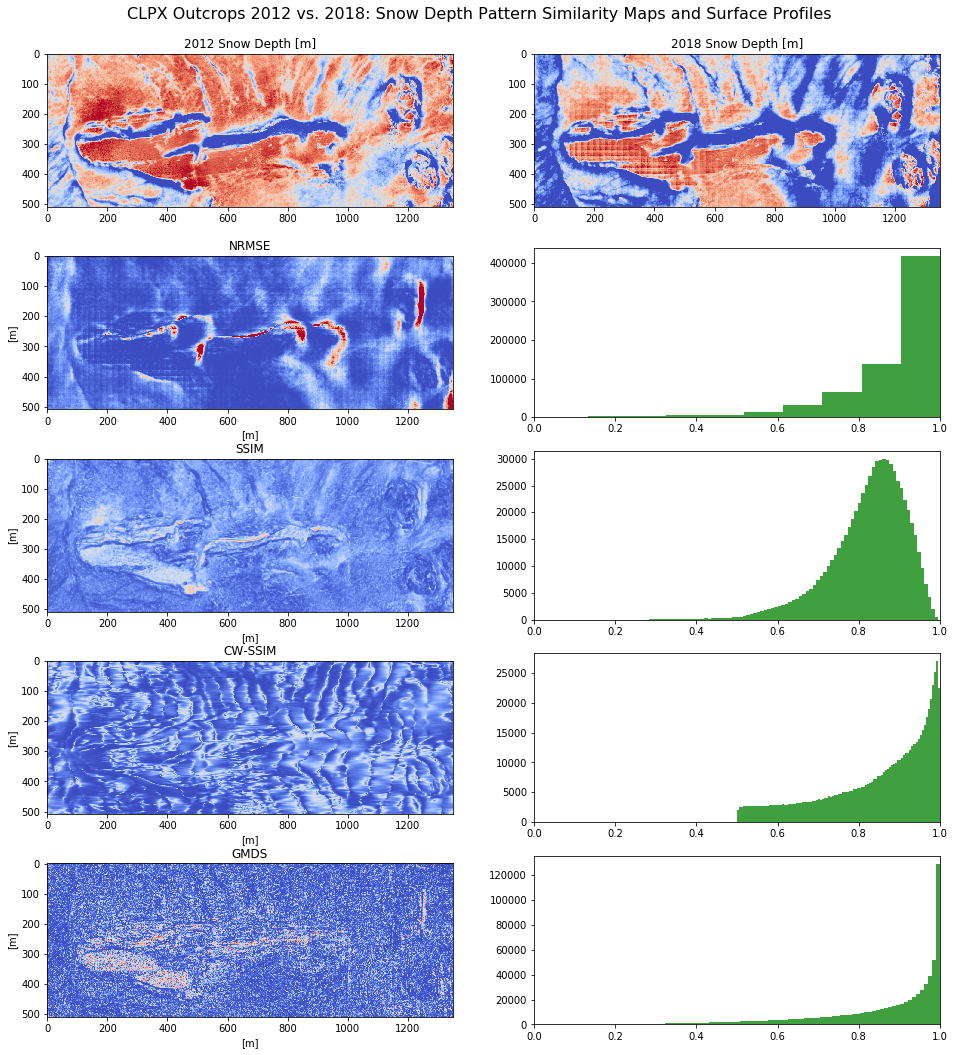

In [10]:
# Plot Snow Depth Maps, IQA Maps, and Profiles from the Minimal point
f, axes = plt.subplots(5, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,18))
titles = ['NRMSE', 'SSIM', 'CW-SSIM', 'GMDS']

axes[0][0].imshow(sd_2012, vmin=0, vmax=1, cmap='coolwarm_r')
axes[0][0].set_title('2012 Snow Depth [m]')
axes[0][1].imshow(sd_2018, vmin=0, vmax=1, cmap='coolwarm_r')
axes[0][1].set_title('2018 Snow Depth [m]')

i = 1 
j = 0

for m in [nrmse, ssim, cwssim, gms]:
    
    lst_sim = find_min_indicies(m, 1)
    
    prof_start = lst_sim[0][1] - 100
    prof_end = lst_sim[0][1] + 100
    prof_line = lst_sim[0][0]

   
    im = axes[i][0].imshow(m, vmin=0, vmax=1, cmap='coolwarm_r')
    
    axes[i][0].set_xlabel('[m]')
    axes[i][0].set_ylabel('[m]')
    
    
    text = axes[i][0].set_title(titles[j])
    
    axes[i][1].hist(m.flatten(), 100, histtype='stepfilled', facecolor='g', alpha=0.75)
    #axes[i][1] = sns.distplot(m.flatten())
    axes[i][1].set_xlim(0,1)

    i +=1
    j +=1

f.suptitle('CLPX Outcrops 2012 vs. 2018: Snow Depth Pattern Similarity Maps and Surface Profiles',
           size=16, y=0.91)

# cbar_ax = f.add_axes([0.15, 0.05, 0.65, 0.051])
# f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#f.savefig('../figures/iqamaps_snowprofiles.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.distplot(cwssim.flatten()

In [ ]:
plt.figure(figsize=(16,10))

ax = plt.imshow(sd_2018 - sd_2012, vmin=-1, vmax=1, cmap='coolwarm')

for i in find_min_indicies(cwssim, round(cwssim.size*0.00001)):
    a = ax.axes.plot(i[0], i[1], ".m", markersize=12.0, markeredgecolor='k')

# for i in find_min_indicies(nrmse, 25):
#     b = ax.axes.plot(i[0], i[1], ".c", markersize=12.0, markeredgecolor='k')
    
# for i in find_min_indicies(ssim, 25):
#     c = ax.axes.plot(i[0], i[1], ".y", markersize=12.0, markeredgecolor='k')
    
# for i in find_min_indicies(gms, 50):
#     d = ax.axes.plot(i[0], i[1], ".g", markersize=12.0, markeredgecolor='k')

a[0].set_label('CW-SSIM')
#b[0].set_label('NRMSE')
#c[0].set_label('SSIM')
#d[0].set_label('GMS')
plt.colorbar(orientation='horizontal')
plt.legend()
#plt.savefig('../../scratch/sim_minima_test.png', dpi=300, bbox_inches='tight')

In [ ]:
# Create DataFrame of profiles along above line
# We smooth everything a bit with savitzky golay filter...

ix = pd.Index([i+1 for i in range(len(dem[:,700]))])
df=pd.DataFrame(index=ix)
df['DEM'] = savgol_filter(dem[:,700], 3, 0)
df['Snow Surface 2018'] = savgol_filter(sd_2018[:,700], 3, 1)*5 + df['DEM']
df['Snow Surface 2012'] = savgol_filter(sd_2012[:,700], 3, 1)*5 + df['DEM']
df['Abs. Snow Difference'] = abs(df['Snow Surface 2012'] - df['Snow Surface 2018'])


df['NRMSE'] = savgol_filter(nrmse[:,700], 1, 0)
df['SSIM'] = savgol_filter(ssim[:,700], 1, 0)

df['CW-SSIM'] = savgol_filter(cwssim[:,700], 1, 0)
df['GMS'] = savgol_filter(gms[:,700], 1, 0)

# This is just to flip the profile so that it aligns with the flux direction
df2 = df.iloc[::-1].reset_index(drop=True)

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(10,16))
fig.subplots_adjust(hspace=0.35)

df2.iloc[:, :3].plot(ax=axes[0])

df2.iloc[:, 3].plot(ax=axes[1], title=df2.iloc[:, 3].name)
axes[1].vlines(np.argmin(df2.iloc[:, 3]), 0.0, 1.0, color='r', alpha=0.3)

df2.iloc[:, 4].plot(ax=axes[2], title=df2.iloc[:, 4].name)
axes[2].vlines(np.argmin(df2.iloc[:, 4]), 0.0, 1.0, color='r', alpha=0.3)

df2.iloc[:, 5].plot(ax=axes[3], title=df2.iloc[:, 5].name)
axes[3].vlines(np.argmin(df2.iloc[:, 5]), 0.0, 1.0, color='r', alpha=0.3)

df2.iloc[:, 6].plot(ax=axes[4], title=df2.iloc[:, 6].name)
axes[4].vlines(np.argmin(df2.iloc[:, 6]), 0.0, 1.0,color='r',alpha=0.3)

df2.iloc[:, 7].plot(ax=axes[5], title=df2.iloc[:, 7].name)
axes[5].vlines(np.argmin(df2.iloc[:, 7]), 0.0, 1.0,color='r',alpha=0.3)

In [ ]:
# Show these similarity minima on map
plt.figure(figsize=(16,10))
plt.imshow(sd_2018)
plt.axvline(x=700,c='r')
plt.axhline(y=np.argmin(df.iloc[:, 7]),c='y')
plt.axhline(y=np.argmin(df.iloc[:, 6]),c='c')
plt.axhline(y=np.argmin(df.iloc[:, 5]),c='m')
plt.axhline(y=np.argmin(df.iloc[:, 4]),c='k')

In [ ]:
import glob

In [ ]:
plt.figure(figsize=(16,10))

ax = plt.imshow(abs(sd_2018-sd_2012), vmin=0, vmax=2)
ax.axes.annotate('gms min', xy=ind_frac,  xycoords='axes fraction',
            xytext=ind_frac_text, textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            );


In [ ]:
ind = np.unravel_index(np.argmin(ssim, axis=None), gms.shape)
ind_frac = (ind[0]/sd_2018.shape[0], ind[1]/sd_2018.shape[1])
ind_frac_text = (ind_frac[0] - 0.15, ind_frac[1] - 0.15)

In [ ]:
find_min_indicies(ssim, 5)

In [ ]:
outpath = '../subsets/clpx_outcrops/raster/iqa/'
pname = '2012 v. 2018'
pname = pname.replace(' ', '_')
import os

pname_dir = os.path.join(outpath, pname)

# try:
#     pdir = os.makedirs(os.path.join(outpath, pname))
# except FileExistsError:
#     # directory already exists
#     pass

#pdir

In [ ]:
pname_dir

In [ ]:
outpath = os.path.join(pname_dir, (pname + '.png'))
outpath